# Results on Synthetic datasets - Prob. images

Presenting results APDL method with respect to diffrent initilisation methods

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os, sys, glob
import pandas, numpy
from skimage import io
import matplotlib.pylab as plt
from matplotlib import gridspec
import apdl.dataset_utils as gen_data
from notebooks.notebook_utils import filter_df_results_4_plotting, plot_apdl_graph_results

## Loading data

In [3]:
# BASE_PATH = '~/Dropbox/Documents/lab_CMP-BIA/paper_2017_drosophila_APDL/data/'
BASE_PATH = 'results'
paths_csv = [# os.path.expanduser(BASE_PATH + 'experiments_synth_APD_prob_results_NEW_OVERALL.csv'),
             os.path.expanduser(os.path.join(BASE_PATH, 'experiments_synth_APDL_prob_results_NEW_OVERALL.csv'))]
# p_csv = os.path.expanduser(os.path.join('results', 'experiments_synth_APD_overall.csv'))
df_all = pandas.DataFrame()
for p_csv in paths_csv:
    print os.path.exists(p_csv), '<-', p_csv
    df_all = df_all.append(pandas.DataFrame().from_csv(p_csv, index_col=None), ignore_index=True)
    print 'nb lines:', len(df_all)

True <- results/experiments_synth_APDL_prob_results_NEW_OVERALL.csv
nb lines:

 55440


/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:9: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


In [4]:
df_all.dropna(subset=['nb_labels', 'atlas_ARS', 'reconstruct_diff'], inplace=True)
print ('-> loaded DF with', len(df_all), 'items and columns:\n', df_all.columns.tolist())
d_unique = {col: df_all[col].unique() for col in df_all.columns}
df_all.sort_values('nb_labels', inplace=True)
print ('-> unique:', {k: len(d_unique[k]) for k in d_unique if len(d_unique[k]) > 1})

-> loaded DF with 55440 items and columns:
['atlas ARS', 'atlas accuracy', 'atlas f1_macro', 'atlas f1_weighted', 'atlas precision_macro', 'atlas precision_weighted', 'atlas recall_macro', 'atlas recall_weighted', 'atlas support_macro', 'atlas support_weighted', 'atlas_ARS', 'class', 'computer', 'dataset', 'files @dir', 'folders', 'gc_regul', 'gc_reinit', 'init_tp', 'max_iter', 'method', 'name', 'nb_jobs', 'nb_labels', 'nb_runs', 'nb_samples', 'overlap_mj', 'path_exp', 'path_in', 'path_out', 'ptn_compact', 'ptn_split', 'reconstruct_diff', 'time', 'tol', 'type']
-> unique:

 {'atlas ARS': 16230, 'atlas accuracy': 3419, 'nb_labels': 28, 'dataset': 14, 'atlas precision_macro': 5628, 'computer': 2, 'reconstruct_diff': 12217, 'atlas recall_weighted': 15978, 'nb_runs': 2, 'nb_jobs': 2, 'atlas_ARS': 16230, 'folders': 4, 'atlas precision_weighted': 3419, 'files @dir': 177, 'path_exp': 3203, 'atlas f1_weighted': 11721, 'name': 42, 'atlas recall_macro': 15966, 'time': 55408, 'path_in': 3, 'init_tp': 18, 'atlas f1_macro': 11783}


In [5]:
df_all = df_all[df_all['method'] == 'APDL']
print ('dropped, now lines:', len(df_all))

dropped, now lines: 55440


## Parse name and noise level

In [6]:
df_all['version'] = map(os.path.basename, df_all['path_in'])
print ('Versions:', df_all['version'].unique().tolist())

Versions: ['atomicPatternDictionary_v0', 'atomicPatternDictionary_v1', 'atomicPatternDictionary_v2']


In [7]:
print 'Datasets:', df_all['dataset'].unique().tolist()

Datasets: ['datasetProb_raw', 'datasetProb_defNoise', 'datasetProb_noise', 'datasetProb_deform', 'datasetProb_raw_gauss-0.100', 'datasetProb_raw_gauss-0.050', 'datasetProb_raw_gauss-0.200', 'datasetProb_raw_gauss-0.150', 'datasetProb_raw_gauss-0.001', 'datasetProb_raw_gauss-0.010', 'datasetProb_raw_gauss-0.125', 'datasetProb_raw_gauss-0.075', 'datasetProb_raw_gauss-0.025', 'datasetProb_raw_gauss-0.005']


In [8]:
noise, dataset_name = [], []
for d in df_all['dataset'].values.tolist():
    if '-' in d:
        noise.append(float(d.split('-')[-1]))
        dataset_name.append(d.split('-')[0])
    else: 
        noise.append(None)
        dataset_name.append(d)
df_all['dataset'] = dataset_name
df_all['noise'] = noise
print ('Datasets:', df_all['dataset'].unique().tolist())
print ('Noise levels:', df_all['noise'].unique().tolist())

Datasets: ['datasetProb_raw', 'datasetProb_defNoise', 'datasetProb_noise', 'datasetProb_deform', 'datasetProb_raw_gauss']
Noise levels: [nan, 0.1, 0.05, 0.2, 0.15, 0.001, 0.01, 0.125, 0.075, 0.025, 0.005]


In [9]:
df_all = df_all[df_all['init_tp'].isin([
    'GT', 'GT-deform', 'random', 'random-grid', 'random-mosaic', 
    'soa-init-DL', 'soa-init-ICA', 'soa-init-PCA', 'soa-init-NFM', 
    'soa-tune-NFM', 'soa-tune-ICA', 'soa-tune-PCA', 'soa-tune-DL'])]

## Dependency on level of noise

take out the series with various param combination

In [10]:
# LIST_GRAPHS = ['atlas ARS', 'atlas accuracy', 'atlas f1_weighted', 'atlas precision_weighted', 'atlas recall_weighted', 'reconstruct_diff', 'time']
LIST_GRAPHS = ['atlas ARS', 'atlas f1_weighted', 'reconstruct_diff', 'time']

{'atomicPatternDictionary_v0': {'GT': [47, 47, 47, 47, 47, 47, 47, 47, 47, 47], 'soa-tune-NFM': [47, 47, 47, 47, 47, 47, 47, 47, 47, 47], 'soa-init-PCA': [47, 47, 47, 47, 47, 47, 47, 47, 47, 47], 'soa-init-NFM': [47, 47, 47, 47, 47, 47, 47, 47, 47, 47], 'random-grid': [47, 47, 47, 47, 47, 47, 47, 47, 47, 47], 'random': [47, 47, 47, 47, 47, 47, 47, 47, 47, 47], 'GT-deform': [47, 47, 47, 47, 47, 47, 47, 47, 47, 47], 'soa-init-DL': [47, 47, 47, 47, 47, 47, 47, 47, 47, 47], 'soa-tune-ICA': [47, 47, 47, 47, 47, 47, 47, 47, 47, 47], 'random-mosaic': [47, 47, 47, 47, 47, 47, 47, 47, 47, 47], 'soa-init-ICA': [47, 47, 47, 47, 47, 47, 47, 47, 47, 47], 'soa-tune-PCA': [47, 47, 47, 47, 47, 47, 47, 47, 47, 47], 'soa-tune-DL': [47, 47, 47, 47, 47, 47, 47, 47, 47, 47]}}


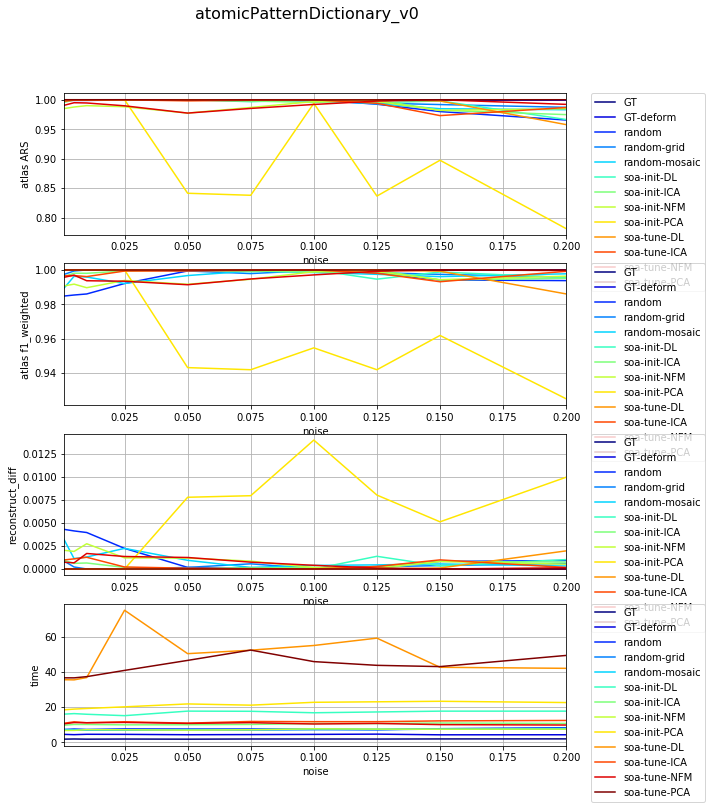

In [15]:
df_select = df_all[df_all['dataset'] == 'datasetProb_raw_gauss']
df_select = df_select[df_select['version'] == 'atomicPatternDictionary_v0']
df_select = df_select[df_select['nb_labels'] == 7]
df_res, dict_samples = filter_df_results_4_plotting(df_select, iter_var='noise', cols=LIST_GRAPHS)
print dict_samples
plot_apdl_graph_results(df_res, 'version', 'init_tp', l_graphs=LIST_GRAPHS, iter_var='noise', figsize=(9, 3))

{'atomicPatternDictionary_v1': {'GT': [47, 47, 47, 47, 47, 47, 47, 47, 47, 47], 'soa-tune-NFM': [47, 47, 47, 47, 47, 47, 47, 47, 47, 47], 'soa-init-PCA': [47, 47, 47, 47, 47, 47, 47, 47, 47, 47], 'soa-init-NFM': [47, 47, 47, 47, 47, 47, 47, 47, 47, 47], 'random-grid': [47, 47, 47, 47, 47, 47, 47, 47, 47, 47], 'random': [47, 47, 47, 47, 47, 47, 47, 47, 47, 47], 'GT-deform': [47, 47, 47, 47, 47, 47, 47, 47, 47, 47], 'soa-init-DL': [47, 47, 47, 47, 47, 47, 47, 47, 47, 47], 'soa-tune-ICA': [47, 47, 47, 47, 47, 47, 47, 47, 47, 47], 'random-mosaic': [47, 47, 47, 47, 47, 47, 47, 47, 47, 47], 'soa-init-ICA': [47, 47, 47, 47, 47, 47, 47, 47, 47, 47], 'soa-tune-PCA': [47, 47, 47, 47, 47, 47, 47, 47, 47, 47], 'soa-tune-DL': [47, 47, 47, 47, 47, 47, 47, 47, 47, 47]}}


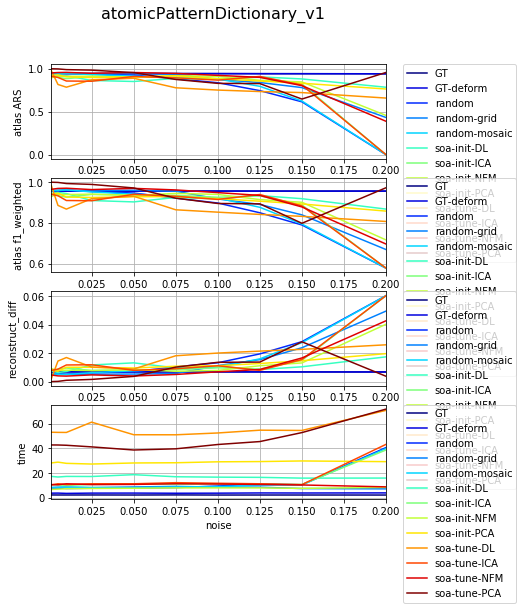

{'atomicPatternDictionary_v1': {'GT': [47, 47, 47, 47, 47, 47, 47, 47, 47, 47], 'soa-tune-NFM': [47, 47, 47, 47, 47, 47, 47, 47, 47, 47], 'soa-init-PCA': [47, 47, 47, 47, 47, 47, 47, 47, 47, 47], 'soa-init-NFM': [47, 47, 47, 47, 47, 47, 47, 47, 47, 47], 'random-grid': [47, 47, 47, 47, 47, 47, 47, 47, 47, 47], 'random': [47, 47, 47, 47, 47, 47, 47, 47, 47, 47], 'GT-deform': [47, 47, 47, 47, 47, 47, 47, 47, 47, 47], 'soa-init-DL': [47, 47, 47, 47, 47, 47, 47, 47, 47, 47], 'soa-tune-ICA': [47, 47, 47, 47, 47, 47, 47, 47, 47, 47], 'random-mosaic': [47, 47, 47, 47, 47, 47, 47, 47, 47, 47], 'soa-init-ICA': [47, 47, 47, 47, 47, 47, 47, 47, 47, 47], 'soa-tune-PCA': [47, 47, 47, 47, 47, 47, 47, 47, 47, 47], 'soa-tune-DL': [47, 47, 47, 47, 47, 47, 47, 47, 47, 47]}}


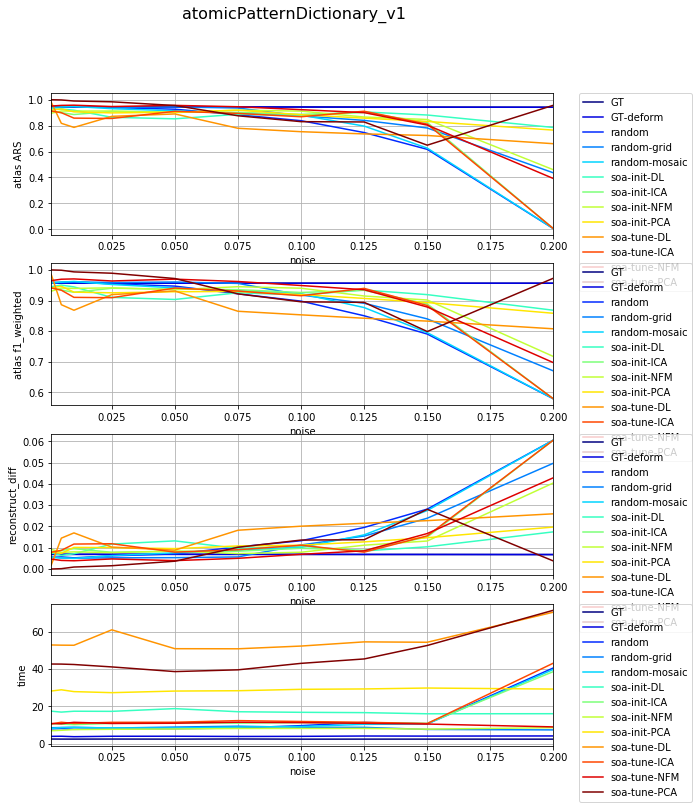

In [16]:
df_select = df_all[df_all['dataset'] == 'datasetProb_raw_gauss']
df_select = df_select[df_select['version'] == 'atomicPatternDictionary_v1']
df_select = df_select[df_select['nb_labels'] == 13]
df_res, dict_samples = filter_df_results_4_plotting(df_select, iter_var='noise', cols=LIST_GRAPHS)
print dict_samples
plot_apdl_graph_results(df_res, 'version', 'init_tp', l_graphs=LIST_GRAPHS, iter_var='noise', figsize=(9, 3))

{'atomicPatternDictionary_v2': {'GT': [47, 47, 47, 47, 47, 47, 47, 47, 46, 46], 'soa-tune-NFM': [47, 47, 47, 47, 47, 47, 47, 47, 46, 46], 'soa-init-PCA': [47, 47, 47, 47, 47, 47, 47, 47, 46, 46], 'soa-init-NFM': [47, 47, 47, 47, 47, 47, 47, 47, 46, 46], 'random-grid': [47, 47, 47, 47, 47, 47, 47, 47, 46, 46], 'random': [47, 47, 47, 47, 47, 47, 47, 47, 46, 46], 'GT-deform': [47, 47, 47, 47, 47, 47, 47, 47, 46, 46], 'soa-init-DL': [47, 47, 47, 47, 47, 47, 47, 47, 46, 46], 'soa-tune-ICA': [47, 47, 47, 47, 47, 47, 47, 47, 46, 46], 'random-mosaic': [47, 47, 47, 47, 47, 47, 47, 47, 46, 46], 'soa-init-ICA': [47, 47, 47, 47, 47, 47, 47, 47, 46, 46], 'soa-tune-PCA': [47, 47, 47, 47, 47, 47, 47, 47, 46, 46], 'soa-tune-DL': [47, 47, 47, 47, 47, 47, 47, 47, 46, 46]}}


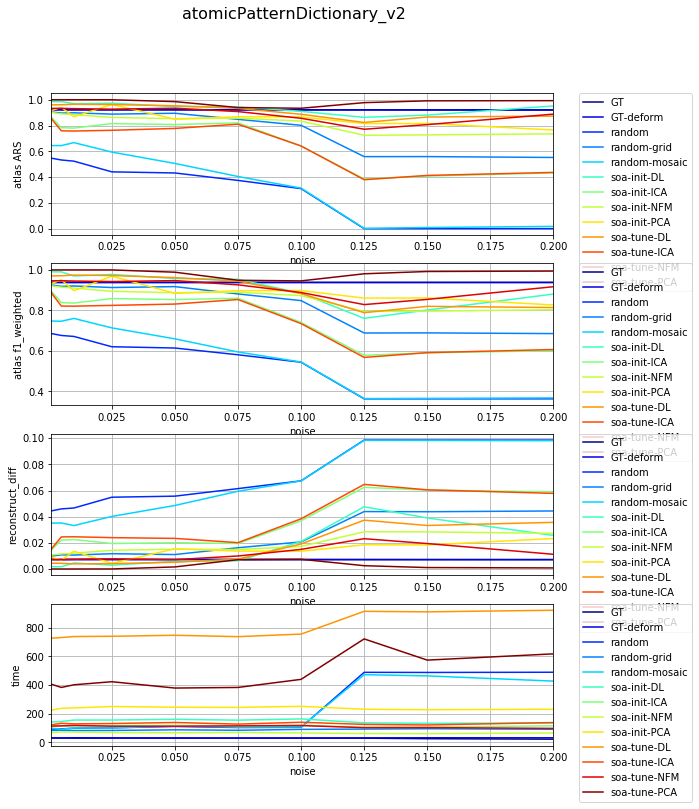

In [18]:
df_select = df_all[df_all['dataset'] == 'datasetProb_raw_gauss']
df_select = df_select[df_select['version'] == 'atomicPatternDictionary_v2']
df_select = df_select[df_select['nb_labels'] == 23]
df_res, dict_samples = filter_df_results_4_plotting(df_select, iter_var='noise', cols=LIST_GRAPHS)
print dict_samples
plot_apdl_graph_results(df_res, 'version', 'init_tp', l_graphs=LIST_GRAPHS, iter_var='noise', figsize=(9, 3))